***
**Introduction to Machine Learning** <br>
__[https://slds-lmu.github.io/i2ml/](https://slds-lmu.github.io/i2ml/)__
***

# Exercise sheet: 12 Nested Resampling

## Exercise 1: Tuning Principles

> a) Suppose that we want to compare four different learners:

| Learner | Tuning required |
| --- | --- |
| Logistic regression (`lm`) | no | 
| CART (`rpart`) | yes | 
| $k$-NN (`kknn`) | yes | 
| LDA (`lda`) | no | 

> For performance evaluation and subsequent comparison, we use $10$-CV as outer resampling strategy. Within the
inner tuning loop, applicable to CART and $k$-NN, we use $5$-CV in combination with random search, drawing
$200$ hyperparameter configurations for each model. Our measure of interest is the AUC. <br>
>> (i) How many models need to be fitted in total to conduct the final benchmark? <br>
>> (ii) Giving the following benchmark result, which learner performs best? Explain your decision.

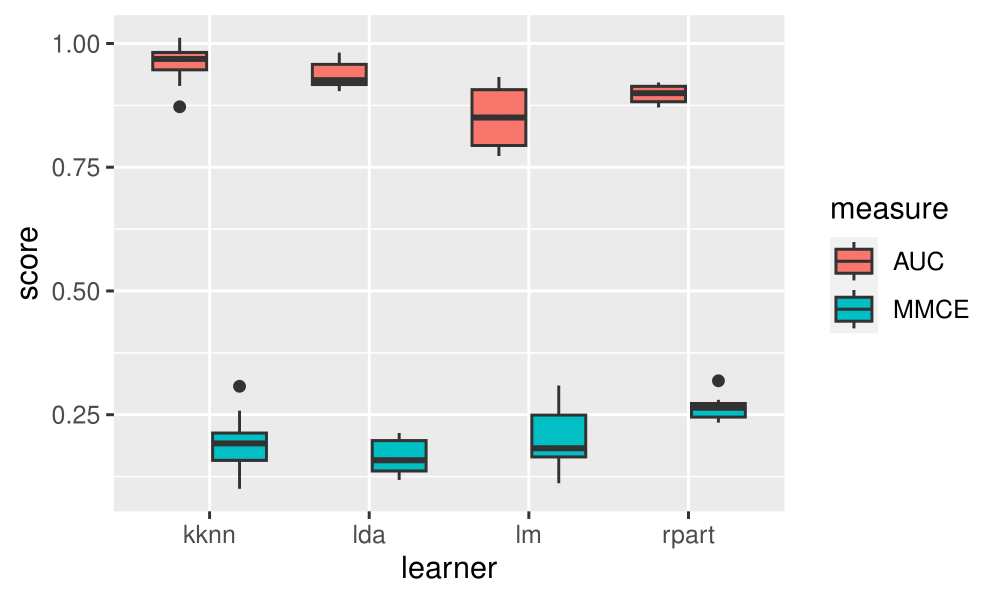

> **\# Entering your answer here:**

> b) Recap briefly what is meant by the *bias-variance trade-off* in resampling.

> **\# Entering your answer here:**

> c) Are the following statements true or not? Explain your answer in one sentence. <br>
>> (i) The bias of the generalization error estimate for $3$-CV is higher than for $10$-CV. <br>
>> (ii) Every outer loss can also be used as inner loss, assuming standard gradient-based optimization.

> **\# Entering your answer here:**

## Exercise 2: AutoML


In this exercise, we build a simple automated machine learning (AutoML) system that will make data-driven
choices on which learner/estimator to use and also conduct the necessary tuning.

### `R` Exercise:

`mlr3pipelines` make this endeavor easy, modular and guarded against many common modeling errors. <br>
We work on the `pima` data to classify patients as diabetic and design a system that is able to choose between $k$-NN
and a random forest, both with tuned hyperparameters. <br>
To this end, we will use a graph learner, a ”single unit of data operation” that can be trained, resampled, evaluated,
. . . as a whole – in other words, treated as any other learner.

> a) Create a task object in `mlr3` (the problem is pre-specified under the ID ”pima”).

In [ ]:
# Entering your code here:

> b) Specify the above learners, where you need to give each learner a name as input to the `id` argument. Convert
each learner to a pipe operator by wrapping them in the sugar function `po()`, and store them in a list.

In [ ]:
# Entering your code here:

> c) Before starting the actual learning pipeline, take care of pre-processing. While this step is highly customizable,
you can use an existing sequence to impute missing values, encode categorical features, and remove variables
with constant value across all observations. For this, specify a pipeline (`ppl()`) of type "`robustify`" (setting
`factors_to_numeric` to `TRUE`).

In [ ]:
# Entering your code here:

> d) Create another `ppl`, of type "`branch`" this time, to enable selection between your learners.

In [ ]:
# Entering your code here:

> e) Chain both pipelines using the double pipe and plot the resulting graph. Next, convert it into a graph learner
with `as_learner()`.

In [ ]:
# Entering your code here:

> f) Now you have a learner object just like any other. Take a look at its tunable hyperparameters. You will optimize
the learner selection, the number of neighbors in $k$-NN (between $3$ and $10$), and the number of split candidates
to try in the random forest (between $1$ and $5$). Define the search range for each like so:

<learner>$param_set$values$<hyperparameter> <- to_tune(p_int(lower, upper))

> `p_int` marks an integer hyperparameter with lower and upper bounds as defined; similar objects exist for other
data types. With `to_tune()`, you signal that the hyperparameter shall be optimized in the given range.

<div class="alert alert-block alert-info">
    <b>Hint:</b>  You need to define dependencies, since the tuning process is defined by which learner is selected in the
first place (no need to tune $k$ in a random forest).<br>
</div>

In [ ]:
# Entering your code here:

> g) Conveniently, there is a sugar function, `tune_nested()`, that takes care of nested resampling in one step. Use
it to evaluate your tuned graph learner with
> - mean classification error as inner loss,
> - random search as tuning algorithm (allowing for $3$ evaluations), and
> - $3$-CV in both inner and outer loop.

In [ ]:
# Entering your code here:

> h) Lastly, extract performance estimates per outer fold (`score()`) and overall (`aggregate()`). If you want to risk
a look under the hood, try `extract_inner_tuning_archives()`.


In [ ]:
# Entering your code here:

### `Python` Exercise:

`sklearn.pipeline.Pipeline` makes this endeavor easy, modular and guarded against many common modeling
errors. <br>
We work on the [`pima`](https://github.com/slds-lmu/lecture_i2ml/blob/master/exercises/data/pima.csv) data to classify patients as diabetic and design a system that is able to choose between $k$-NN
and a random forest, both with tuned hyperparameters. <br>
The purpose of the pipeline is to assemble several steps of transformation and a final estimator that can be crossvalidated together while setting different parameters. So to speak, the pipeline estimator can be treated as any
other estimator.

> a) Load the data set [`pima`](https://github.com/slds-lmu/lecture_i2ml/blob/master/exercises/data/pima.csv), encode the target "`diabetes`" as $0$-$1$-vector and perform a stratified `train_test_split`.

In [ ]:
# Entering your code here:

> b) As part of our modeling process, we want to perform certain preprocessing steps. While this step is highly
customizable, we want to include at least One-Hot-Encoding of categorical features, and imputing of missing
values. <br>
Instance a `ColumnTransformer` object and include these two steps for a dynamic choice of columns.

<div class="alert alert-block alert-info">
    <b>Hint:</b>   Strings are considered as <code>dtype = object</code> <br>
</div>

In [ ]:
# Entering your code here:

> c) Next, both pipelines for the $k$-NN and random forest are created. Like this you can create estimators with highly
individual preprocessing steps. Include the previously created `ColumnTransformer`, a `VarianceThreshold` to
remove constant columns and the corresponding estimator as a final step. Additionally, scale the columns for
the $k$-NN estimator.

In [ ]:
# Entering your code here:

> d) A very common ensembling technique is to predict according to the decisions of numerous estimators. This is
refered to as `VotingClassifier` and enables you to predict the class label based on the argmax of the sums
of the predicted probabilities. Instanciate a `VotingClassifier` with the two classifier pipelines for $k$-NN and
random forest.

<div class="alert alert-block alert-info">
    <b>Hint:</b> set the parameters `<code>voting = "soft"</code> and <code>n_jobs = -1</code> for parallel computation. <br>
</div>

In [ ]:
# Entering your code here:

> e) Now you have an estimator object just like any other. Take a look at its tunable hyperparameters. You will
optimize the number of neighbors in $k$-NN (between $3$ and $10$), and the number of split candidates to try in the
random forest (between $1$ and $5$). Define the search range for each like so:

In [ ]:
param_grid_voting = [{"<voting_estimator1>__<pipelie1_estimator>__<hyperparameter>":
                        list(<parameter_range>)},
                    {"<voting_estimator2>__<pipelie2_estimator>__<hyperparameter>":
                        list(<parameter_range>)}]

> Please note, that the estimator names should be on par with the labels given in the `VotingClassifier`, the
`Pipeline` and, of course, the hyperparameter of the used estimator in the pipeline. Each level of hyperparameters of our created ensemble estimator is accessable through the seperation ”__” (double underscore).

In [ ]:
# Entering your code here:

> f) Nested Resampling is a method to avoid the so called *optimization bias* by tuning parameters and evaluation
performance on different subsets of your training data. Use
> - Stratified $3$-CV in both inner and outer loop.
> - accuracy as inner performance measure,
> - grid search as tuning algorithm. <br>

> You may use the following, incomplete code to compute the nested resampling:

In [ ]:
NUM_OUTER_FOLDS = <...>
nested_scores_voting = np.zeros(NUM_OUTER_FOLDS) # initalize scores with 0
# Choose cross-validation techniques for the inner and outer loops,
# independently of the dataset.
# E.g "GroupKFold", "LeaveOneOut", "LeaveOneGroupOut", etc.
inner_cv = <...>(n_splits=<...>, shuffle=True, random_state=42)
outer_cv = <...>(n_splits=<...>, shuffle=True, random_state=42)

for i, (train_index, val_index) in enumerate(outer_cv.split(X_train, y_train)):
    # Nested CV with parameter optimization for ensemble pipeline
    clf_gs_voting = <...>(
        estimator=<...>,
        param_grid=<...>,
        cv=<...>,
        n_jobs=-1
    )
    clf_gs_voting.fit(X_train.iloc[<...>], y_train[<...>])
    nested_scores_voting[i] = clf_gs_voting.score(X_train.iloc[<...>], y_train[<...>])


In [ ]:
# Entering your code here:

> g) Extract performance estimates per outer fold and overall (as mean). According to your results, determin the
best classifier object.


In [ ]:
# Entering your code here:

> h) Lastly, evaluate the performance on the test set. Think about the imbalance of your data set and how this is
affecting the performance measurement accuracy. Try to find a better metric and compare these two.

In [ ]:
# Entering your code here:

Congrats, you just designed a turn-key AutoML system that does (nearly) all the work with a few lines of code!

## Exercise 3: Kaggle Challeng

Make yourself familiar with the Titanic Kaggle challenge [https://www.kaggle.com/c/titanic](https://www.kaggle.com/c/titanic). <br>
Based on everything you have learned in this course, do your best to achieve a good performance in the survival
challenge.
- Try out different classifiers you have encountered during the course (or maybe even something new?)
- Improve the prediction by creating new features (feature engineering).
- Tune your parameters (see: https://mlr3book.mlr-org.com/tuning.html or https://scikit-learn.org/stable/modules/grid_search.html).
- How do you fare compared to the public leaderboard?


<div class="alert alert-block alert-info">
    <b> <code>mlr3</code> Hint:</b> Use the <code>titanic</code> package to directly access the data. Use <code>titanic::titanic_train</code> for training and <code>titanic::titanic_test</code> for your final prediction. <br>
</div>

In [ ]:
# Entering your code here: